In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use("seaborn-whitegrid")

import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#load data
df = pd.read_csv("data/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
def categorical_vis(variable):
    
    var = df[variable].value_counts()
    
    x = var.index
    y = var
    if variable == "Reached.on.Time_Y.N":
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.xticks([0,1])
        plt.show()
        print("{}: \n {}".format(variable,var))
    else:
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.show()
        print("{}: \n {}".format(variable,var))

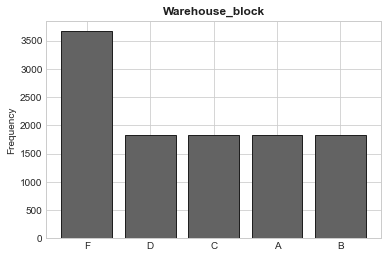

Warehouse_block: 
 F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64


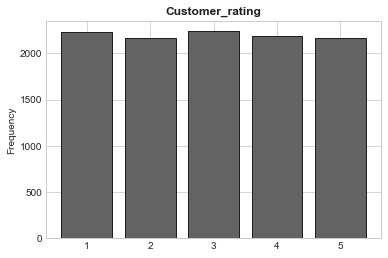

Customer_rating: 
 3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64


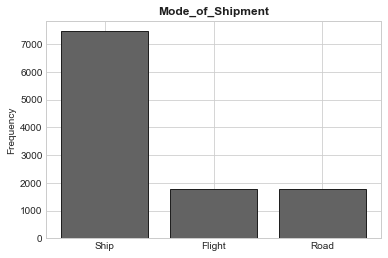

Mode_of_Shipment: 
 Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


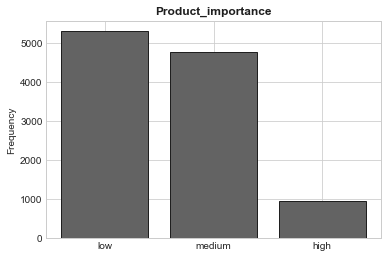

Product_importance: 
 low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64


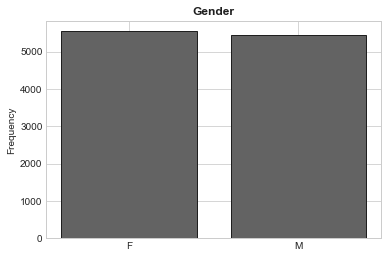

Gender: 
 F    5545
M    5454
Name: Gender, dtype: int64


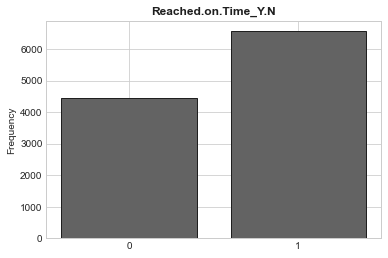

Reached.on.Time_Y.N: 
 1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


In [7]:
categorical = ["Warehouse_block","Customer_rating","Mode_of_Shipment","Product_importance","Gender","Reached.on.Time_Y.N"]
for cat in categorical:
    categorical_vis(cat)

In [8]:
def numerical_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

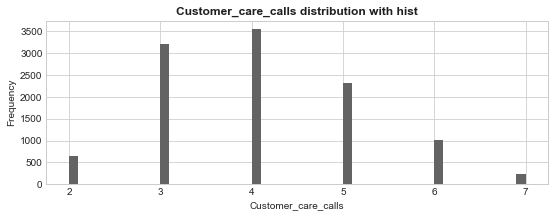

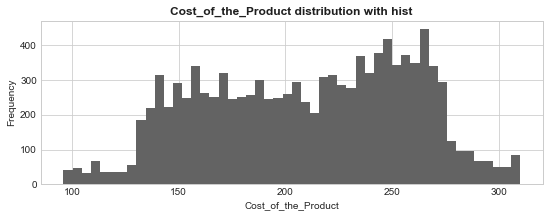

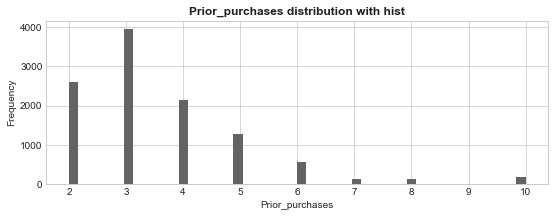

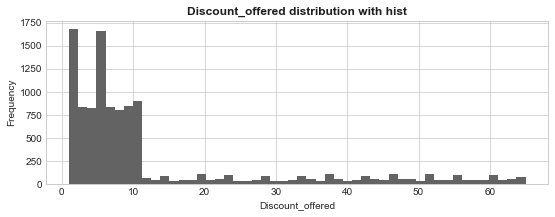

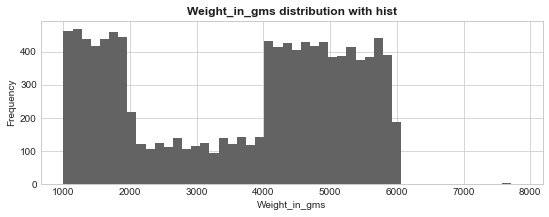

In [9]:
numerical = ["Customer_care_calls","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]
for num in numerical:
    numerical_vis(num)

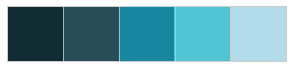

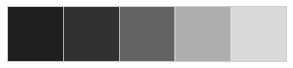

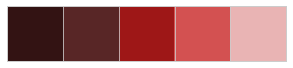

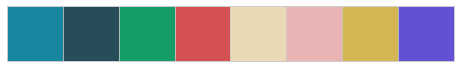

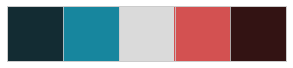

In [10]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']
sns.set_palette("mako")

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

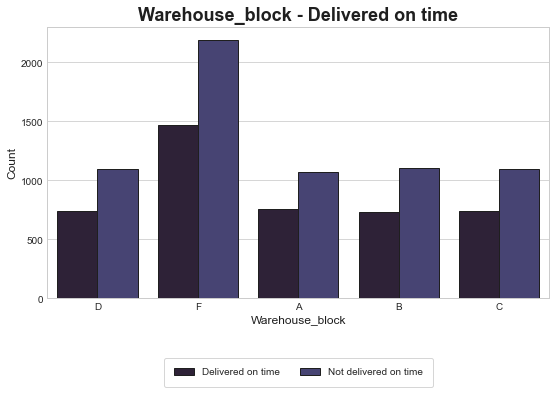

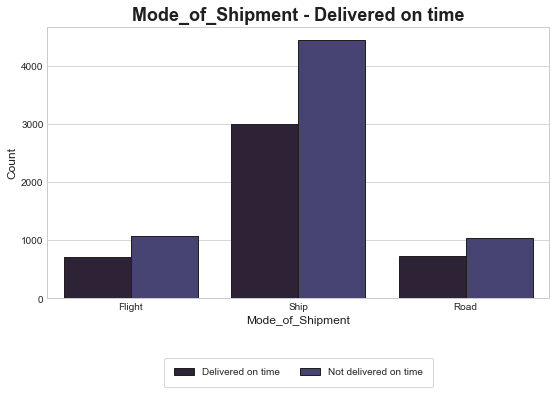

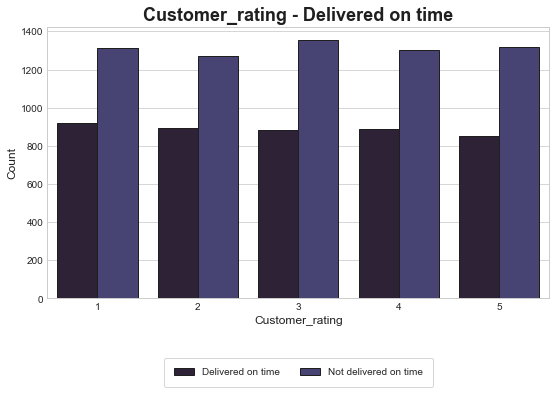

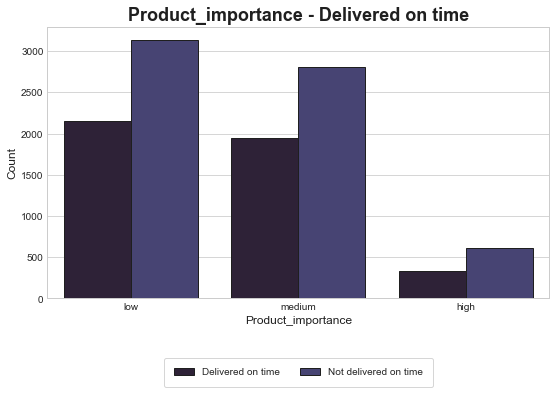

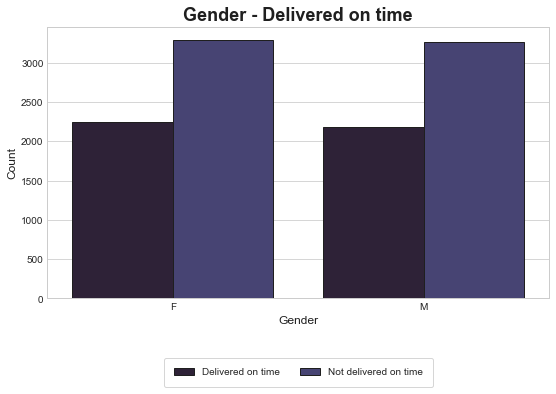

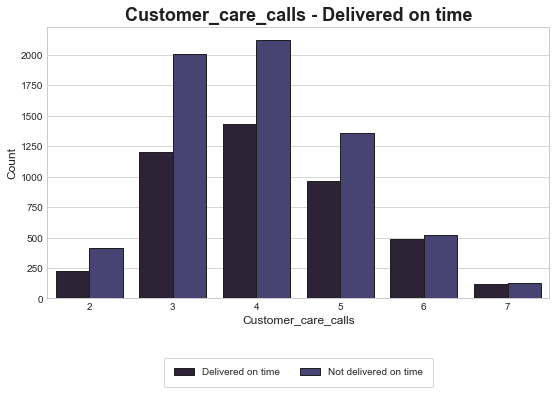

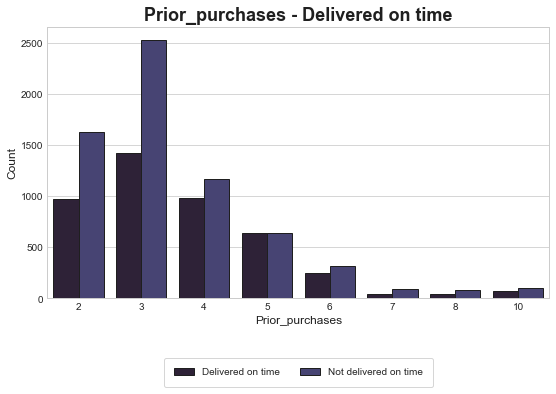

In [11]:
features = ["Warehouse_block","Mode_of_Shipment","Customer_rating","Product_importance","Gender","Customer_care_calls","Prior_purchases"]

for f in features:
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.countplot(x=f,data=df,hue="Reached.on.Time_Y.N",edgecolor=colors_dark[0])
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
    plt.ylabel("Count",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.xlabel(f"{f}",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.title("{} - Delivered on time".format(f), fontsize=18, fontweight='bold', color=colors_dark[0])
    plt.show()

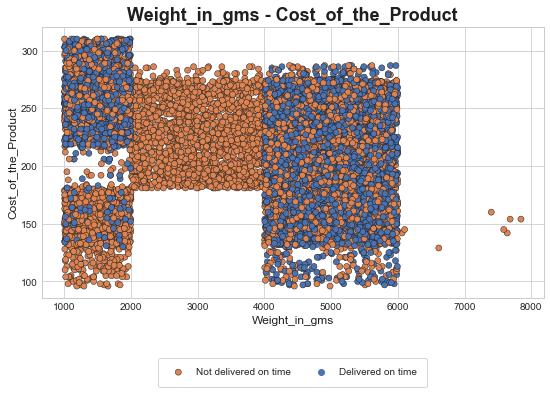

In [12]:

fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=df,edgecolor=colors_dark[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("Cost_of_the_Product",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Weight_in_gms",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Weight_in_gms - Cost_of_the_Product", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

In [13]:
rate_mean = []
avg = df["Customer_rating"].mean()
for i in range(2,8):
    rate_mean.append(float(df[df["Customer_care_calls"]==i]["Customer_rating"].mean()))
    
calls=df.Customer_care_calls.sort_values(ascending=True).unique()

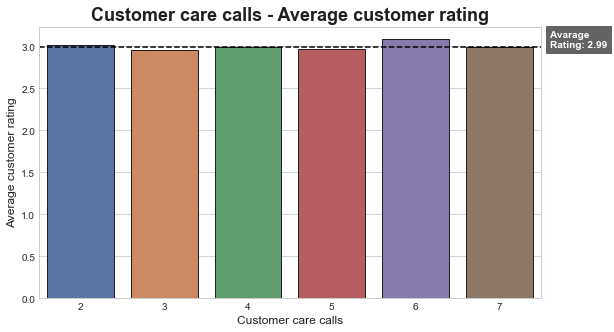

In [14]:
df[df["Customer_care_calls"]==i]["Customer_rating"].mean()
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=calls,y=rate_mean,edgecolor=colors_dark[0],palette="deep")
ax.axhline(avg, linestyle='--', color="black")
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(
    s="Avarage\nRating: {:.2f}".format(avg),
    x=xmax*1.02,
    y=avg,
    backgroundcolor=colors_dark[2],
    fontsize=10,
    fontweight='bold',
    color='white'
)
plt.ylabel("Average customer rating",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Customer care calls",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Customer care calls - Average customer rating", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

<AxesSubplot:>

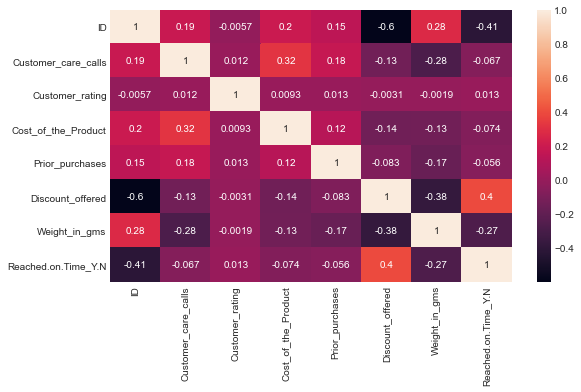

In [15]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True)

## Oulier

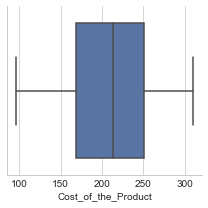

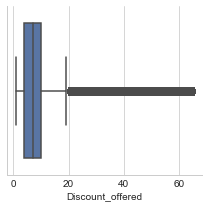

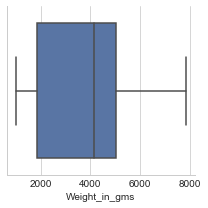

In [16]:
boxes = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]
for bx in boxes:
    g = sns.FacetGrid(df)
    g.map(sns.boxplot, bx,palette="deep")
    plt.show()

In [17]:
from scipy.stats import zscore

for i in boxes:
    print(i)
    z_scores = zscore(df[i])
    print("*"*50)
    for threshold in np.arange(1.5,5,0.5):
        print("Treshold: {}".format(threshold))
        print("Amount of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('------')

Cost_of_the_Product
**************************************************
Treshold: 1.5
Amount of Outliers: 454
------
Treshold: 2.0
Amount of Outliers: 66
------
Treshold: 2.5
Amount of Outliers: 0
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Discount_offered
**************************************************
Treshold: 1.5
Amount of Outliers: 1382
------
Treshold: 2.0
Amount of Outliers: 999
------
Treshold: 2.5
Amount of Outliers: 584
------
Treshold: 3.0
Amount of Outliers: 181
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Weight_in_gms
**************************************************
Treshold: 1.5
Amount of Outliers: 7
------
Treshold: 2.0
Amount of Outliers: 5
------
Treshold: 2.5
Amount of Outliers: 1
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 

In [18]:
for i in boxes:
    z_scores = zscore(df[i])
    print(z_scores)

[-0.69072171  0.12074558 -0.56588059 ...  0.66172378  0.26639356
 -1.14847249]
[ 1.88998336  2.81563557  2.13682395 ... -0.57842252 -0.70184282
 -0.45500223]
[-1.46823975 -0.33389333 -0.15900218 ... -1.51593733 -1.48230442
 -1.2199677 ]


In [19]:
for i in boxes:
    z_scores = zscore(df[i])
    df["z_scores_{}".format(i)] = z_scores
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,z_scores_Cost_of_the_Product,z_scores_Discount_offered,z_scores_Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,-0.690722,1.889983,-1.468240
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.120746,2.815636,-0.333893
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,-0.565881,2.136824,-0.159002
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,-0.711529,-0.208162,-1.502484
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,-0.545074,2.013404,-0.703244


In [20]:
indices = df[(df["z_scores_Cost_of_the_Product"]>=2) | (df["z_scores_Discount_offered"]>=2) | (df["z_scores_Weight_in_gms"]>=2)].index.to_list()
cleaned_data = df

for i in indices:
    cleaned_data = cleaned_data.drop(index=i,axis=0)

cleaned_data[(cleaned_data["z_scores_Cost_of_the_Product"]>=2) | (cleaned_data["z_scores_Discount_offered"]>=2) | (cleaned_data["z_scores_Weight_in_gms"]>=2)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,z_scores_Cost_of_the_Product,z_scores_Discount_offered,z_scores_Weight_in_gms


In [21]:
df.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)
cleaned_data.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)

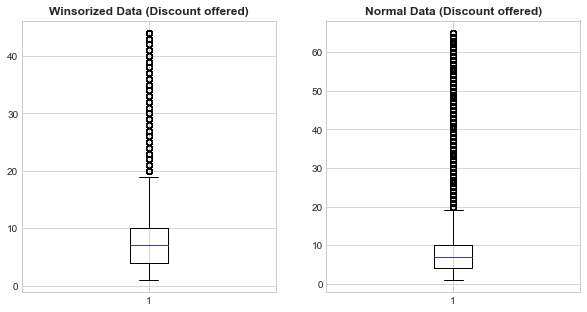

In [22]:
from scipy.stats.mstats import winsorize

winsorized= winsorize(df["Discount_offered"],(0,0.10))

#Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized)
plt.title("Winsorized Data (Discount offered)",fontsize=12,fontweight="bold")
plt.subplot(1,2,2)
plt.boxplot(df["Discount_offered"].values)
plt.title("Normal Data (Discount offered)",fontsize=12,fontweight="bold")
plt.show()

In [23]:
winsorized_data = df
winsorized_data["Discount_offered"] = winsorized
winsorized_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,44,3088,1
2,3,A,Flight,2,2,183,4,low,M,44,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,44,2484,1


In [24]:
new = winsorized_data["Cost_of_the_Product"]/winsorized_data["Weight_in_gms"]
winsorized_data["discount_rate"] = new.values

In [25]:
cleaned_data = pd.get_dummies(cleaned_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
cleaned_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
cleaned_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
cleaned_data.drop(columns=["ID"],axis=1,inplace=True)

#one hot encoding
winsorized_data = pd.get_dummies(winsorized_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
winsorized_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
winsorized_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
winsorized_data.drop(columns=["ID"],axis=1,inplace=True)

winsorized_data.reset_index(drop=True,inplace=True)
cleaned_data.reset_index(drop=True,inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

con_data= cleaned_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]
con_data2= winsorized_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]

X = StandardScaler().fit_transform(con_data)
X2 = StandardScaler().fit_transform(con_data2)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca2 = PCA(n_components=2)
Y_sklearn2 = sklearn_pca2.fit_transform(X2)
print("Outliers Deleted Data")
print(sklearn_pca.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca.explained_variance_ratio_:
    value += i
    print(value)

print("\n")
print("Winsorized Data")  
print(sklearn_pca2.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca2.explained_variance_ratio_:
    value += i
    print(value)

Outliers Deleted Data
[0.39064276 0.3145339 ]
Cumulative:
0.3906427645878043
0.7051766656806464


Winsorized Data
[0.37517334 0.33991853]
Cumulative:
0.3751733365160719
0.7150918712928176


In [27]:
pca_new = pd.DataFrame(Y_sklearn,columns=["PC1","PC2"])
pca_new2 = pd.DataFrame(Y_sklearn2,columns=["PC1","PC2"])

clean_pca = pd.concat([cleaned_data,pca_new],axis=1)
clean_pca = clean_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

win_pca = pd.concat([winsorized_data,pca_new2],axis=1)
win_pca = win_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#non-pca and outliers deleted data
non_cl_y = cleaned_data["Reached.on.Time_Y.N"]
non_cl_X = cleaned_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(non_cl_X,non_cl_y,test_size=0.33,random_state=123)

#non-pca and winsorized data
non_win_y = winsorized_data["Reached.on.Time_Y.N"]
non_win_X = winsorized_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(non_win_X,non_win_y,test_size=0.33,random_state=123)

#pca and outliers deleted data
cl_y = clean_pca["Reached.on.Time_Y.N"]
cl_X = clean_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(cl_X,cl_y,test_size=0.33,random_state=123)

#pca and winsorized data
win_y = win_pca["Reached.on.Time_Y.N"]
win_X = win_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(win_X,win_y,test_size=0.33,random_state=123)

In [29]:
rf= RandomForestClassifier(max_depth = 7,min_samples_leaf=1,min_samples_split=4,criterion="entropy",random_state=123)

print("non-pca and outliers deleted data")
rf.fit(X_train1,y_train1)
y_pred1 = rf.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
rf.fit(X_train2,y_train2)
y_pred2 = rf.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
rf.fit(X_train3,y_train3)
y_pred3 = rf.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
rf.fit(X_train4,y_train4)
y_pred4 = rf.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[ 814 1014]
 [ 131 1318]]
0.6505950564540739
******************************
non-pca and winsorized data
[[1181  982]
 [ 128 1339]]
0.6942148760330579
******************************
pca and outliers deleted data
[[ 982  846]
 [ 393 1056]]
0.621910283796155
******************************
pca and winsorized data
[[1263  900]
 [ 290 1177]]
0.6721763085399449


In [30]:
knn= KNeighborsClassifier(n_neighbors=5)

print("non-pca and outliers deleted data")
knn.fit(X_train1,y_train1)
y_pred1 = knn.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
knn.fit(X_train2,y_train2)
y_pred2 = knn.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
knn.fit(X_train3,y_train3)
y_pred3 = knn.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
knn.fit(X_train4,y_train4)
y_pred4 = knn.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[1135  693]
 [ 570  879]]
0.6145865120537076
******************************
non-pca and winsorized data
[[1483  680]
 [ 579  888]]
0.653168044077135
******************************
pca and outliers deleted data
[[1129  699]
 [ 604  845]]
0.6023802258162954
******************************
pca and winsorized data
[[1472  691]
 [ 609  858]]
0.6418732782369146


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss="exponential",n_estimators=90,criterion="mse",random_state=123, )

print("non-pca and outliers deleted data")
GBC.fit(X_train1,y_train1)
y_pred1 = GBC.predict(X_test1)

print(confusion_matrix(y_test1,y_pred1))
print(accuracy_score(y_test1,y_pred1))
print("*"*30)

print("non-pca and winsorized data")
GBC.fit(X_train2,y_train2)
y_pred2 = GBC.predict(X_test2)

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print("*"*30)

print("pca and outliers deleted data")
GBC.fit(X_train3,y_train3)
y_pred3 = GBC.predict(X_test3)

print(confusion_matrix(y_test3,y_pred3))
print(accuracy_score(y_test3,y_pred3))
print("*"*30)

print("pca and winsorized data")
GBC.fit(X_train4,y_train4)
y_pred4 = GBC.predict(X_test4)

print(confusion_matrix(y_test4,y_pred4))
print(accuracy_score(y_test4,y_pred4))

non-pca and outliers deleted data
[[ 848  980]
 [ 147 1302]]
0.6560878852609093
******************************
non-pca and winsorized data
[[1256  907]
 [ 209 1258]]
0.6925619834710743
******************************
pca and outliers deleted data
[[ 936  892]
 [ 315 1134]]
0.6316753127860848
******************************
pca and winsorized data
[[1247  916]
 [ 281 1186]]
0.6702479338842975


In [32]:
rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],
         }

In [33]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=rf,
                       param_grid = params,
                       cv = 10
                      )
grid_cv.fit(non_win_X, non_win_y)

print("Best Parameters : ", grid_cv.best_params_)

Best Parameters :  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}
